# Ejemplo 1
Este ejemplo ilustra el uso de la librería Sickit-learn para árboles de decisión, y algunas funciones útiles para hacer una inspección inicial del conjunto de datos a trabajar. El ejemplo se ha construido para el curso de inteligencia artíficial de la Universidad del Magdalena. El conjunto de datos tomado como ejemplo es: https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree

import warnings

Cargando el conjunto de datos de un archivo extensión .cvs, y mostrando información del archivo.

In [13]:
#Cargando datos
heart = pd.read_csv("./heart.csv")
#Informacion de los datos
print(heart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


Convirtiendo Variables Categoricas A Numericas 
Sex , ChestPainType , RestingECG , ExerciseAngina , ST_Slope . 
Teniendo en cuenta El orden Factorize , No orden onehotEncoding.


In [14]:
from sklearn import preprocessing

labelEnc = preprocessing.LabelEncoder()
new_target = labelEnc.fit_transform(heart['Sex'])
onehotEnc = preprocessing.OneHotEncoder()
onehotEnc.fit(new_target.reshape(-1, 1))
targets_trans = onehotEnc.transform(new_target.reshape(-1, 1))
heart['Sex'] = targets_trans.toarray()
#no orden

heartclass = heart['ChestPainType']
heartclass_econded, heartclass_categories = heartclass.factorize()
heart['ChestPainType'] = heartclass_econded
#orden

labelEnc = preprocessing.LabelEncoder()
new_target = labelEnc.fit_transform(heart['RestingECG'])
onehotEnc = preprocessing.OneHotEncoder()
onehotEnc.fit(new_target.reshape(-1, 1))
targets_trans = onehotEnc.transform(new_target.reshape(-1, 1))
heart['RestingECG'] = targets_trans.toarray()
#no orden

labelEnc = preprocessing.LabelEncoder()
new_target = labelEnc.fit_transform(heart['ExerciseAngina'])
onehotEnc = preprocessing.OneHotEncoder()
onehotEnc.fit(new_target.reshape(-1, 1))
targets_trans = onehotEnc.transform(new_target.reshape(-1, 1))
heart['ExerciseAngina'] = targets_trans.toarray()
#no orden

heartclass = heart['ST_Slope']
heartclass_econded, heartclass_categories = heartclass.factorize()
heart['ST_Slope'] = heartclass_econded
print(heart.info())
#orden

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    float64
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    float64
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    float64
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 86.2 KB
None


In [15]:
#Resumen de estadísticos
heart.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.210240,1.452070,132.396514,198.799564,0.233115,0.204793,136.809368,0.595861,0.887364,0.638344,0.553377
std,9.432617,0.407701,0.851832,18.514154,109.384145,0.423046,0.403770,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,0.000000,1.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,2.000000,130.000000,223.000000,0.000000,0.000000,138.000000,1.000000,0.600000,1.000000,1.000000
75%,60.000000,0.000000,2.000000,140.000000,267.000000,0.000000,0.000000,156.000000,1.000000,1.500000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,1.000000,202.000000,1.000000,6.200000,2.000000,1.000000


Visualizando la distribución de las clases a través de un histograma.

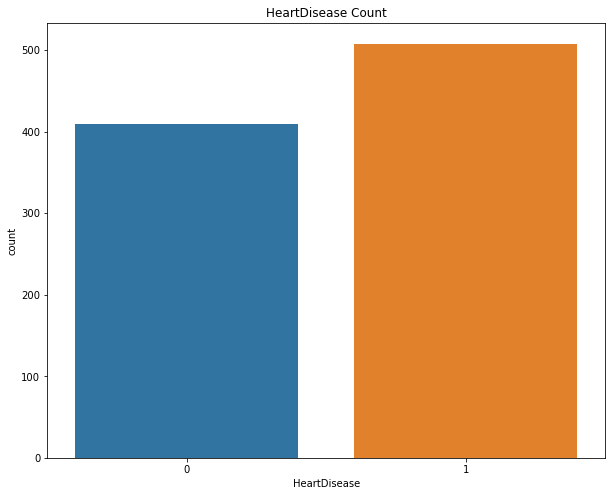

In [16]:
#Histograma del atributo clase
ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x='HeartDisease',data=heart)
plt.title("HeartDisease Count")
plt.show()

In [17]:
#aplicando arboles de decisión
#Como los arboles de decisión no son sensibles a la escala de los predictores, vamos a utilizar el conjunto de datos
#original

y_target = heart['HeartDisease']
x_data = heart.drop(['HeartDisease'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size=0.20)

clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=20)
clf = clf.fit(x_train,y_train)

#Evaluación en el conjunto de prueba
y_pred = clf.predict(x_test)

print('Accuracy de DecisionTreeClassifier sobre el conjunto de prueba es: {:.2f}'.format(clf.score(x_test, y_test))) 
cmatrix = confusion_matrix(y_test, y_pred)
print(cmatrix)

print(classification_report(y_test, y_pred))
print(x_data.columns)

Accuracy de DecisionTreeClassifier sobre el conjunto de prueba es: 0.80
[[64 23]
 [13 84]]
              precision    recall  f1-score   support

           0       0.83      0.74      0.78        87
           1       0.79      0.87      0.82        97

    accuracy                           0.80       184
   macro avg       0.81      0.80      0.80       184
weighted avg       0.81      0.80      0.80       184

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')
